<a href="https://colab.research.google.com/github/szaveri99/recommender_book/blob/main/book_recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generate Personalized Reading Recommendations from a Book Dataset**

**Task:** Develop a simple but creative recommendation system using Python to provide personalized reading recommendations.

**Dataset:** You can find many book datasets online, but here are a couple of suggestions:

*   Goodreads Book Datasets
*   Book-Crossings Dataset

**Steps for Creating Models**

1.   Data preprocessing
2.   Feature engineering
3.   Recommendation model
4.   Evaluation
5.   User Interface

**Kaggle Dataset Setup**

In [ ]:
# install kaggle
!pip install -q kaggle

In [ ]:
# upload the kaggle.json file from your local and uncomment it
# from google.colab import files
# files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"szaveri99","key":"58406672451b8ae4a65c7bcb35a6c083"}'}

In [ ]:
# create kaggle folder
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# copy the kaggle.json file to the kaggle folder
!cp  kaggle.json ~/.kaggle/

In [ ]:
# permission for the json file to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#  list all the dataset present in the kaggle
!kaggle datasets list

ref                                                        title                                          size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023               47KB  2023-08-26 11:04:57          27585        832  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset         Customer Shopping Trends Dataset              146KB  2023-10-05 06:45:37           2614         64  1.0              
joebeachcapital/seoul-bike-sharing                         Seoul Bike Sharing Demand                     126KB  2023-10-03 01:48:46            643         27  1.0              
nelgiriyewithana/credit-card-fraud-detection-dataset-2023  Credit Card Fraud Detection Dataset 2023      143MB  202

In [ ]:
# copy the api command from kaggle and access the dataset
!kaggle datasets download -d jealousleopard/goodreadsbooks

goodreadsbooks.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# unzip the kaggle dataset
!unzip goodreadsbooks.zip

Archive:  goodreadsbooks.zip
replace books.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**Import Libraries and read Data**

In [ ]:
# import the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read the csv file
books_dataset = pd.read_csv("books.csv",error_bad_lines=False)

# read the columns
books_dataset.columns


<ipython-input-42-24ea7f987b62>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books_dataset = pd.read_csv("books.csv",error_bad_lines=False)
Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

**Structure of the Dataset**

In [ ]:
# number of rows and columns
books_dataset.shape

(11123, 12)

In [ ]:
# datatypes of the columns
books_dataset.dtypes

bookID                  int64
title                  object
authors                object
average_rating        float64
isbn                   object
isbn13                  int64
language_code          object
  num_pages             int64
ratings_count           int64
text_reviews_count      int64
publication_date       object
publisher              object
dtype: object

In [ ]:
# rename the columns
books_dataset = books_dataset.rename(columns={"  num_pages": "num_pages"})

In [ ]:
# see the first 10 rows of datset by default head() shows 1st 5 rows
books_dataset.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
# this works only on numeric data which shows the central tendency -> mean, median and mode and spreadness of the data
books_dataset.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


**Find and replace missing values**

In [ ]:
# find the total missing values present
books_dataset.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
# alternative method to find the null values
books_dataset.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

**Treat the outliers**

In [ ]:
df = books_dataset[['average_rating','isbn13','num_pages','ratings_count','text_reviews_count']]

[]

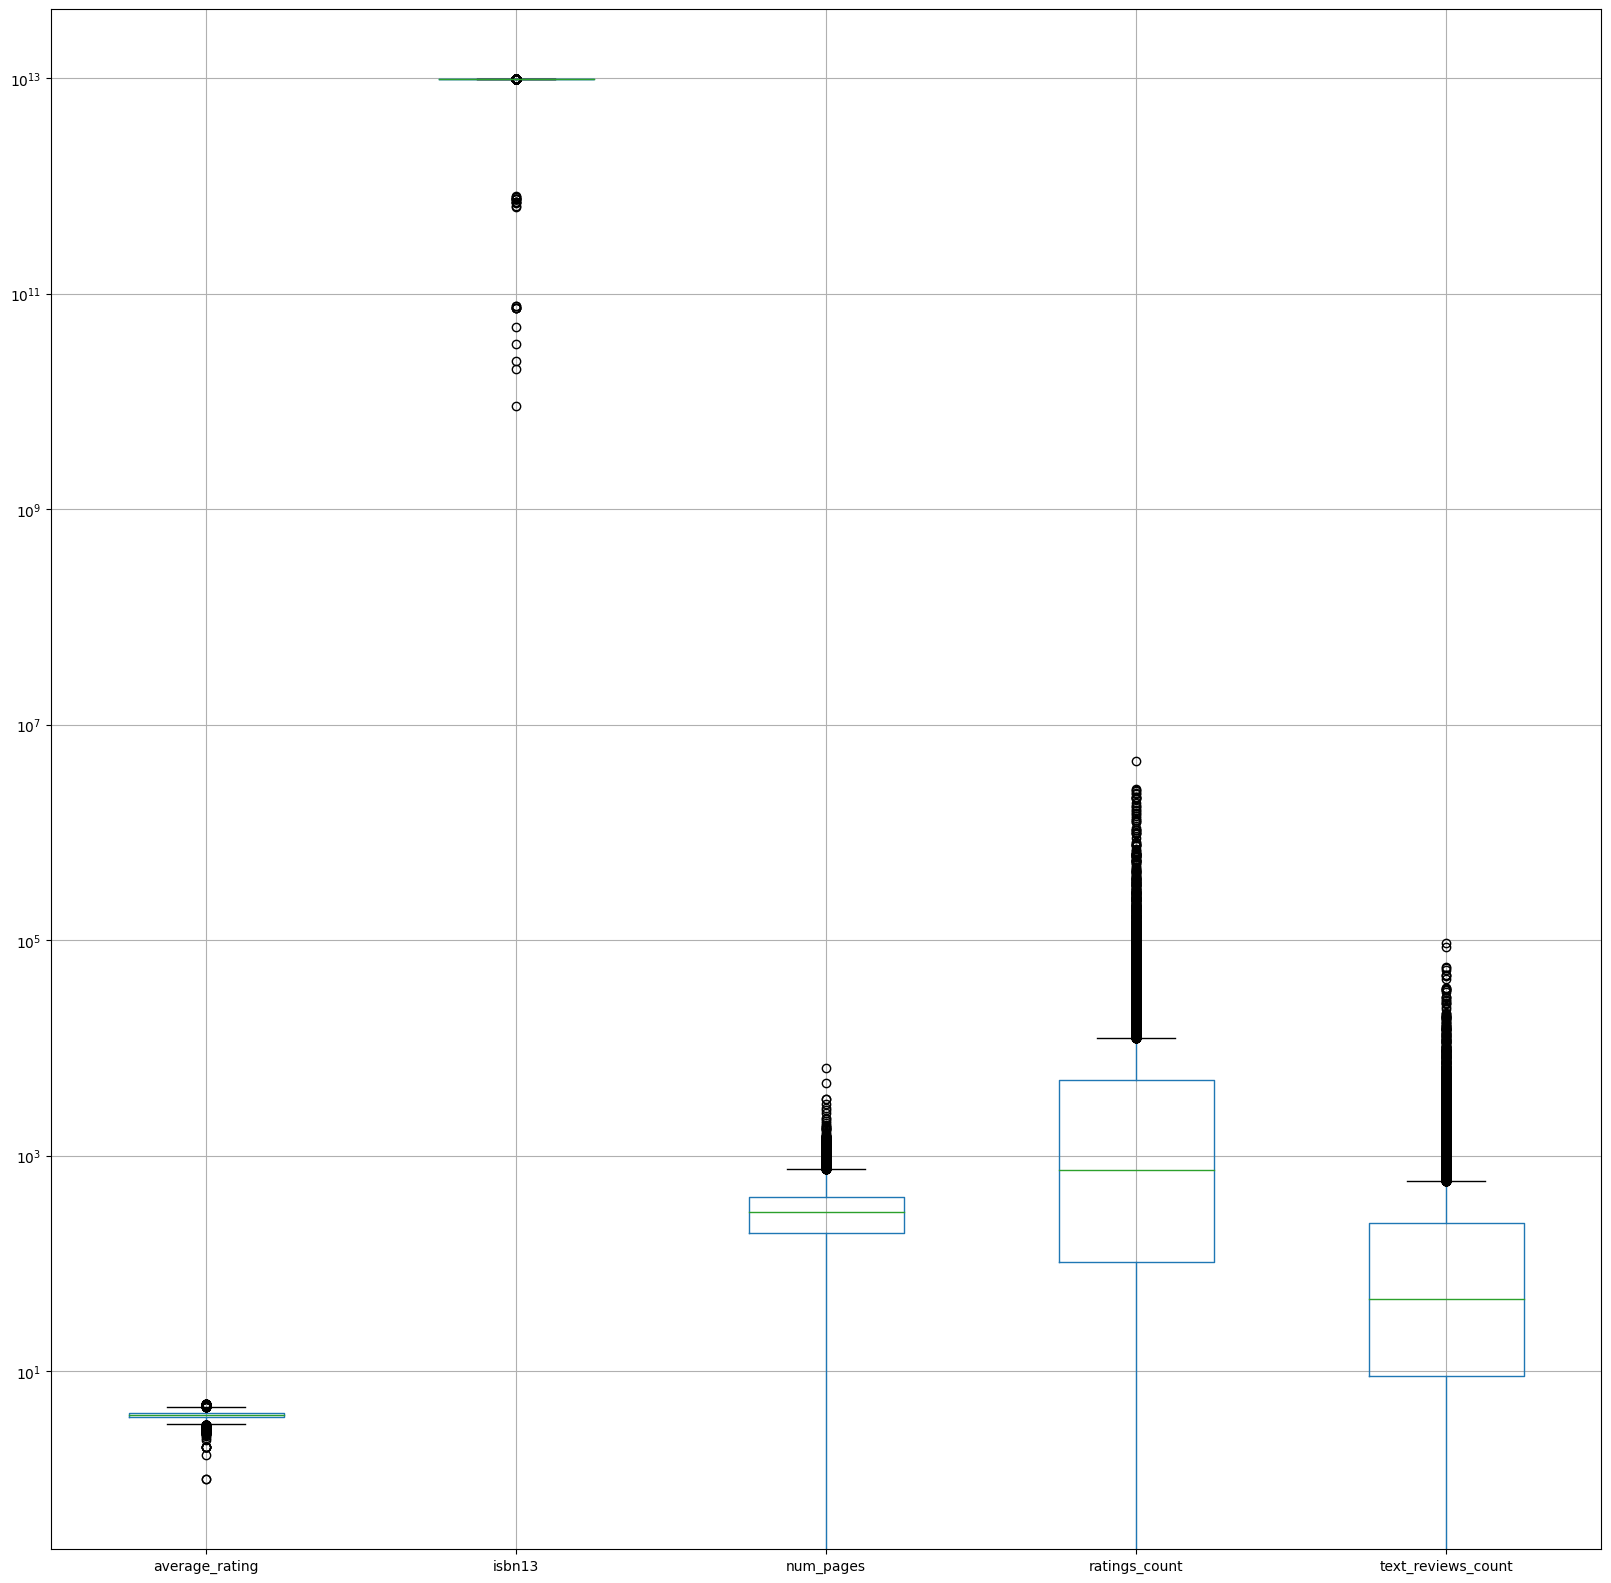

In [ ]:
# overall boxplot for all the numeric variables

df.boxplot(figsize=(20,20))
plt.semilogy()

{'whiskers': [<matplotlib.lines.Line2D at 0x7b5eff803b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7b5eff8016f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b5eff807eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b5efe900dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b5efe900bb0>],
 'means': []}

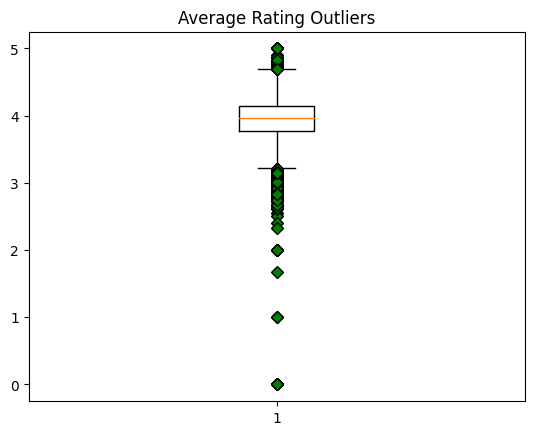

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Average Rating Outliers')
ax1.boxplot(df['average_rating'], flierprops=green_diamond)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b5efe88cc70>,
 'caps': [<matplotlib.lines.Line2D at 0x7b5efe88d1b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b5efe88c9d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b5efe88d6f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b5efe88d990>],
 'means': []}

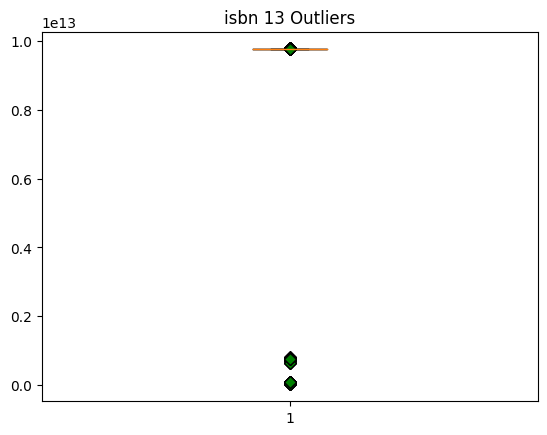

In [ ]:
# values with exponential

green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('isbn 13 Outliers')
ax1.boxplot(df['isbn13'], flierprops=green_diamond)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b5efa947a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7b5efa947fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b5efa9477c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7b5efa974520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b5efa9747c0>],
 'means': []}

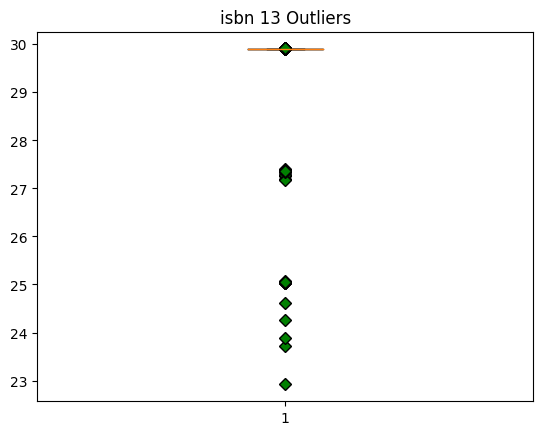

In [ ]:
# with log values
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('isbn 13 Outliers')
ax1.boxplot(np.log(df['isbn13']), flierprops=green_diamond)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b5efa9ce9b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b5efa9cef20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b5efa9ce710>],
 'medians': [<matplotlib.lines.Line2D at 0x7b5efa9cf460>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b5efa9cf700>],
 'means': []}

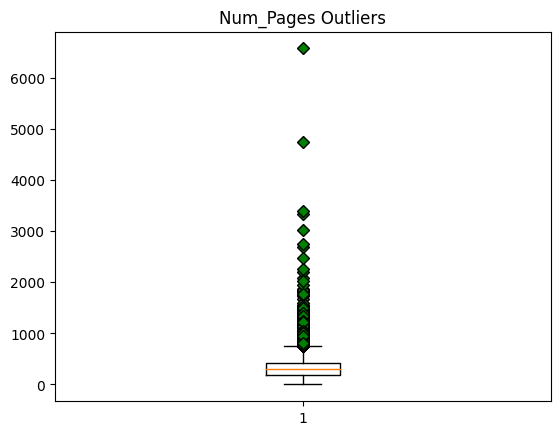

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Num_Pages Outliers')
ax1.boxplot(df['num_pages'], flierprops=green_diamond)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b5efa83dc00>,
 'caps': [<matplotlib.lines.Line2D at 0x7b5efa83e140>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b5efa83d960>],
 'medians': [<matplotlib.lines.Line2D at 0x7b5efa83e680>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b5efa83e920>],
 'means': []}

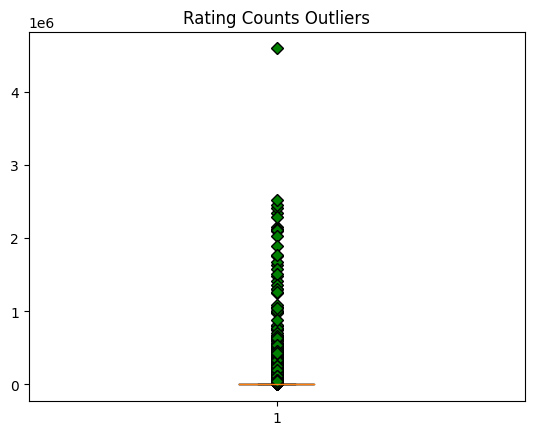

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Rating Counts Outliers')
ax1.boxplot(df['ratings_count'], flierprops=green_diamond)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


{'whiskers': [<matplotlib.lines.Line2D at 0x7b5efa8c03a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7b5efa8c08e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b5efa8c0220>],
 'medians': [<matplotlib.lines.Line2D at 0x7b5efa8c0e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b5efa8c10c0>],
 'means': []}

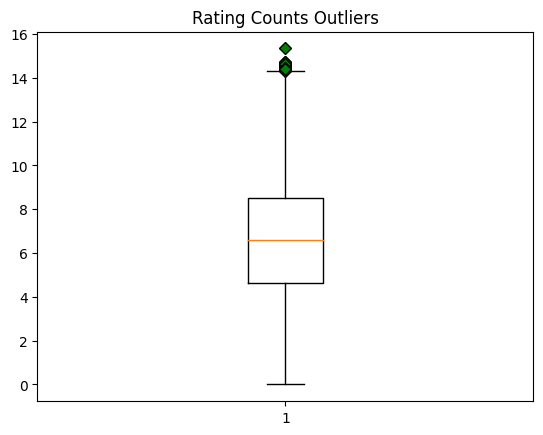

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Rating Counts Outliers')
ax1.boxplot(np.log(df['ratings_count']), flierprops=green_diamond)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b5efa734d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7b5efa735270>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b5efa734a90>],
 'medians': [<matplotlib.lines.Line2D at 0x7b5efa7357b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b5efa735a50>],
 'means': []}

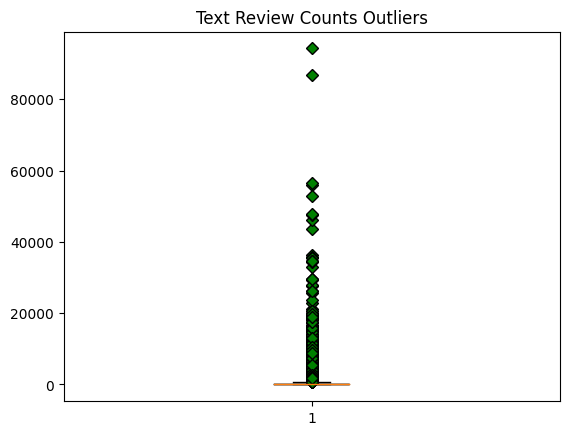

In [ ]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Text Review Counts Outliers')
ax1.boxplot(df['text_reviews_count'], flierprops=green_diamond)

In [ ]:
# each numeric variable is having outlier to treat it, the use of capping by normalizing the values

def scaling_outliers(x):
    quant = np.percentile(x, q=[25, 75])
    cap = np.percentile(x, q=[5, 95])
    q = 1.5 * (quant[1] - quant[0])

    x[x < (quant[0] - q)] = cap[0]
    x[x > (quant[1] + q)] = cap[1]

    return x

In [ ]:
books_dataset[df.columns] = books_dataset[df.columns].apply(scaling_outliers)


**Plots after treating the outliers**

[]

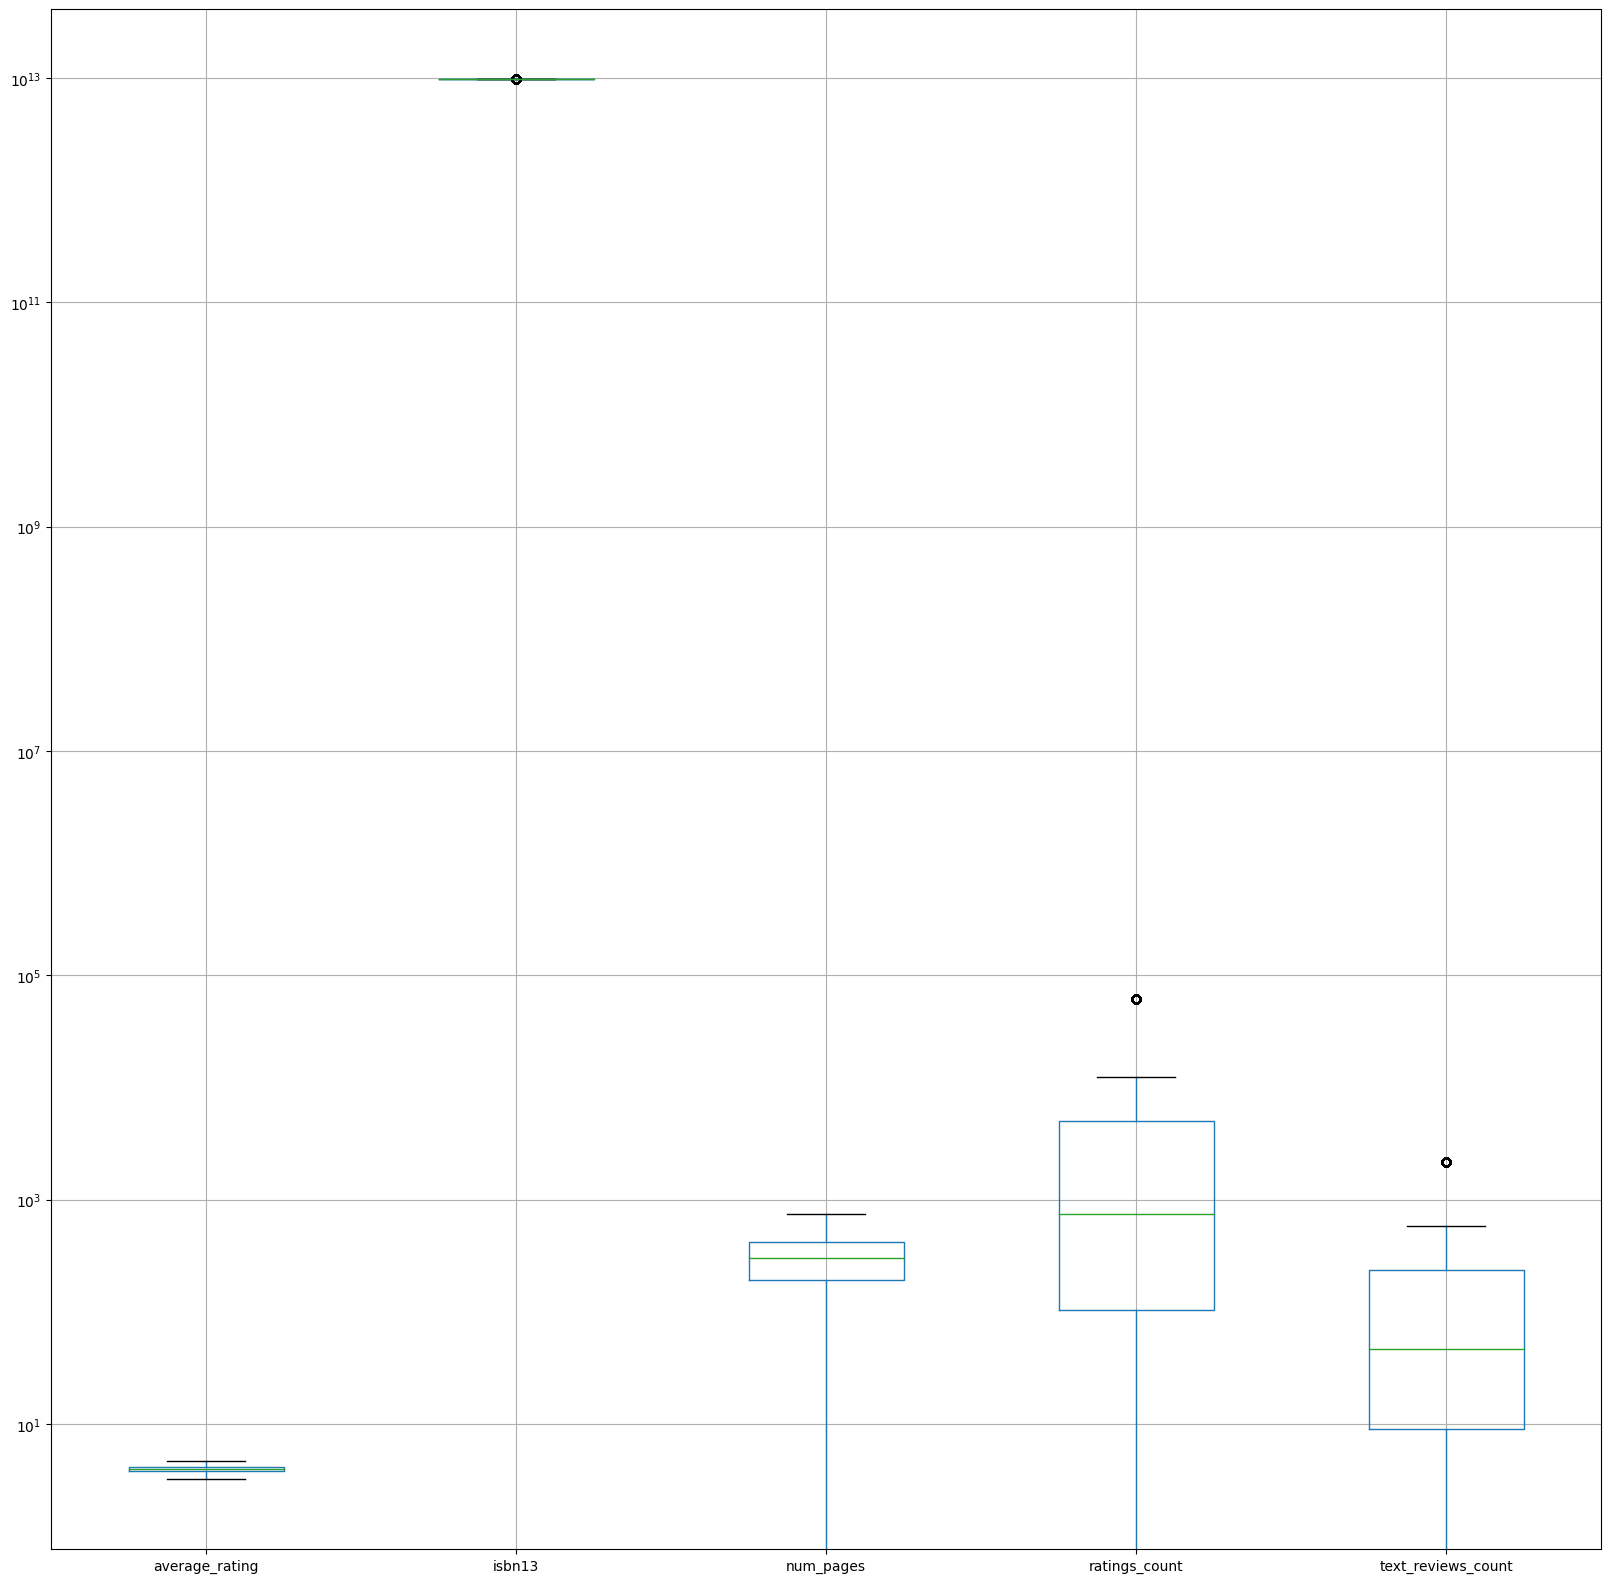

In [ ]:
# overall detecting outliers with boxplot after scaling the outliers

df1 = books_dataset[df.columns]
df1.boxplot(figsize=(20,20))
plt.semilogy()

**Remove duplicated values**

In [ ]:
# remove duplicated values from books title
books_dataset.duplicated(subset='title').sum()

775

In [ ]:
books_dataset = books_dataset.drop_duplicates(subset='title')

In [ ]:
# check for the duplicated values again
books_dataset.duplicated(subset='title').sum()

0

**Data Cleaning**

In [ ]:
books_dataset.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,harry potter and the half-blood prince (harry ...,j.k.rowling/marygrandpré,4.57,0439785960,9.780440e+12,eng,652,61114.0,2158.9,9/16/2006,scholastic inc.
1,2,harry potter and the order of the phoenix (har...,j.k.rowling/marygrandpré,4.49,0439358078,9.780439e+12,eng,752,61114.0,2158.9,9/1/2004,scholastic inc.
2,4,harry potter and the chamber of secrets (harry...,j.k.rowling,4.42,0439554896,9.780440e+12,eng,352,6333.0,244.0,11/1/2003,scholastic
3,5,harry potter and the prisoner of azkaban (harr...,j.k.rowling/marygrandpré,4.56,043965548X,9.780440e+12,eng,435,61114.0,2158.9,5/1/2004,scholastic inc.
4,8,harry potter boxed set books 1-5 (harry potte...,j.k.rowling/marygrandpré,4.38,0439682584,9.780440e+12,eng,752,61114.0,164.0,9/13/2004,scholastic


In [ ]:
def text_clean(author):
    res = str(author).lower()
    return(res.replace(' ',''))

books_dataset['authors'] = books_dataset['authors'].apply(text_clean)

<ipython-input-68-2e6d22ad24a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_dataset['authors'] = books_dataset['authors'].apply(text_clean)


In [ ]:
# convert the publisher and book-title to lowercase

books_dataset['title'] = books_dataset['title'].str.lower()
books_dataset['publisher'] = books_dataset['publisher'].str.lower()


<ipython-input-70-bd09de35cedf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_dataset['title'] = books_dataset['title'].str.lower()
<ipython-input-70-bd09de35cedf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_dataset['publisher'] = books_dataset['publisher'].str.lower()


In [ ]:
df1 = books_dataset[['authors','title','publisher']]

df1['data'] = df1[df1.columns[1:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

print(df1['data'].head())

0    harry potter and the half-blood prince (harry ...
1    harry potter and the order of the phoenix (har...
2    harry potter and the chamber of secrets (harry...
3    harry potter and the prisoner of azkaban (harr...
4    harry potter boxed set  books 1-5 (harry potte...
Name: data, dtype: object


<ipython-input-72-8084299f261a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['data'] = df1[df1.columns[1:]].apply(


In [ ]:
# load the libraries for machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[[1.         0.79115481 0.75907212 ... 0.09759001 0.         0.        ]
 [0.79115481 1.         0.81892302 ... 0.17817416 0.         0.        ]
 [0.75907212 0.81892302 1.         ... 0.10101525 0.         0.        ]
 ...
 [0.09759001 0.17817416 0.10101525 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
vectorizer = CountVectorizer()
vectorized = vectorizer.fit_transform(df1['data'])
similarities = cosine_similarity(vectorized)
print(similarities)

[[1.         0.79115481 0.75907212 ... 0.09759001 0.         0.        ]
 [0.79115481 1.         0.81892302 ... 0.17817416 0.         0.        ]
 [0.75907212 0.81892302 1.         ... 0.10101525 0.         0.        ]
 ...
 [0.09759001 0.17817416 0.10101525 ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [ ]:
vect_data =  pd.DataFrame(similarities, columns=df1['title'], index=df1['title']).reset_index()
vect_data.head()

title,title,harry potter and the half-blood prince (harry potter #6),harry potter and the order of the phoenix (harry potter #5),harry potter and the chamber of secrets (harry potter #2),harry potter and the prisoner of azkaban (harry potter #3),harry potter boxed set books 1-5 (harry potter #1-5),"unauthorized harry potter book seven news: ""half-blood prince"" analysis and speculation",harry potter collection (harry potter #1-6),the ultimate hitchhiker's guide: five complete novels and one story (hitchhiker's guide to the galaxy #1-5),the ultimate hitchhiker's guide to the galaxy (hitchhiker's guide to the galaxy #1-5),...,o cavalo e o seu rapaz (as crónicas de nárnia #3),o sobrinho do mágico (as crónicas de nárnia #1),a viagem do caminheiro da alvorada (as crónicas de nárnia #5),o príncipe caspian (as crónicas de nárnia #4),whores for gloria,expelled from eden: a william t. vollmann reader,you bright and risen angels,the ice-shirt (seven dreams #1),poor people,las aventuras de tom sawyer
0,harry potter and the half-blood prince (harry ...,1.000000,0.791155,0.759072,0.800000,0.670820,0.552052,0.734847,0.161515,0.143839,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.097590,0.097590,0.0,0.0
1,harry potter and the order of the phoenix (har...,0.791155,1.000000,0.818923,0.852013,0.612372,0.314970,0.670820,0.245737,0.262613,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.089087,0.178174,0.0,0.0
2,harry potter and the chamber of secrets (harry...,0.759072,0.818923,1.000000,0.828079,0.694365,0.357143,0.760639,0.167183,0.148888,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.101015,0.101015,0.0,0.0
3,harry potter and the prisoner of azkaban (harr...,0.800000,0.852013,0.828079,1.000000,0.670820,0.345033,0.734847,0.161515,0.143839,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.097590,0.097590,0.0,0.0
4,harry potter boxed set books 1-5 (harry potte...,0.670820,0.612372,0.694365,0.670820,1.000000,0.385758,0.821584,0.060193,0.053606,...,0.0,0.0,0.0,0.0,0.129099,0.0,0.109109,0.109109,0.0,0.0


In [ ]:
x = books_dataset[['title']].iloc[0]
vect_data.columns

Index(['title', 'harry potter and the half-blood prince (harry potter  #6)',
       'harry potter and the order of the phoenix (harry potter  #5)',
       'harry potter and the chamber of secrets (harry potter  #2)',
       'harry potter and the prisoner of azkaban (harry potter  #3)',
       'harry potter boxed set  books 1-5 (harry potter  #1-5)',
       'unauthorized harry potter book seven news: "half-blood prince" analysis and speculation',
       'harry potter collection (harry potter  #1-6)',
       'the ultimate hitchhiker's guide: five complete novels and one story (hitchhiker's guide to the galaxy  #1-5)',
       'the ultimate hitchhiker's guide to the galaxy (hitchhiker's guide to the galaxy  #1-5)',
       ...
       'o cavalo e o seu rapaz (as crónicas de nárnia  #3)',
       'o sobrinho do mágico (as crónicas de nárnia  #1)',
       'a viagem do caminheiro da alvorada (as crónicas de nárnia  #5)',
       'o príncipe caspian (as crónicas de nárnia  #4)', 'whores for gloria

In [ ]:
input_book = 'harry potter and the half-blood prince (harry potter  #6)'
recommendations = pd.DataFrame(vect_data.nlargest(5,input_book)['title'])
recommendations = recommendations[recommendations['title']!=input_book]
print(recommendations)

                                               title
3  harry potter and the prisoner of azkaban (harr...
1  harry potter and the order of the phoenix (har...
2  harry potter and the chamber of secrets (harry...
6       harry potter collection (harry potter  #1-6)


In [ ]:
recommender_df = books_dataset.merge(vect_data, on='title', how='left')
recommender_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,...,o cavalo e o seu rapaz (as crónicas de nárnia #3),o sobrinho do mágico (as crónicas de nárnia #1),a viagem do caminheiro da alvorada (as crónicas de nárnia #5),o príncipe caspian (as crónicas de nárnia #4),whores for gloria,expelled from eden: a william t. vollmann reader,you bright and risen angels,the ice-shirt (seven dreams #1),poor people,las aventuras de tom sawyer
0,1,harry potter and the half-blood prince (harry ...,j.k.rowling/marygrandpré,4.57,0439785960,9.780440e+12,eng,652,61114.0,2158.9,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.097590,0.097590,0.0,0.0
1,2,harry potter and the order of the phoenix (har...,j.k.rowling/marygrandpré,4.49,0439358078,9.780439e+12,eng,752,61114.0,2158.9,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.089087,0.178174,0.0,0.0
2,4,harry potter and the chamber of secrets (harry...,j.k.rowling,4.42,0439554896,9.780440e+12,eng,352,6333.0,244.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.101015,0.101015,0.0,0.0
3,5,harry potter and the prisoner of azkaban (harr...,j.k.rowling/marygrandpré,4.56,043965548X,9.780440e+12,eng,435,61114.0,2158.9,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.097590,0.097590,0.0,0.0
4,8,harry potter boxed set books 1-5 (harry potte...,j.k.rowling/marygrandpré,4.38,0439682584,9.780440e+12,eng,752,61114.0,164.0,...,0.0,0.0,0.0,0.0,0.129099,0.0,0.109109,0.109109,0.0,0.0


In [ ]:
recommender_df.to_csv('books_recommender.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls


 books.csv		 drive		     'kaggle (1).json'	 sample_data
 books_recommender.csv	 goodreadsbooks.zip   kaggle.json


In [ ]:
from google.colab import files
files.download('books_recommender.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>